<a href="https://www.kaggle.com/code/olgatasenko/svm-classification?scriptVersionId=167560842" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd 
import numpy as np
import joblib
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import tree 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


import warnings
warnings.filterwarnings("ignore")

In [2]:
df_pat = pd.read_csv('/kaggle/input/data-acc/patients_new.csv')
df_con = pd.read_csv('/kaggle/input/data-acc/control_new.csv')

In [3]:
df_con = df_con.drop(columns = ['Unnamed: 0'])
df_pat = df_pat.drop(columns = ['Unnamed: 0'])

df_con['target'] = ['control'] * len(df_con)
df_pat['target'] = ['patient'] * len(df_pat)

df_merged = pd.concat([df_pat, df_con], axis=0, ignore_index=True)

In [4]:
df_merged

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,loudness_sma3_amean,loudness_sma3_stddevNorm,spectralFlux_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,...,shimmerLocaldB_sma3nz_amean,shimmerLocaldB_sma3nz_stddevNorm,F1frequency_sma3nz_amean,F1frequency_sma3nz_stddevNorm,F1bandwidth_sma3nz_amean,F1bandwidth_sma3nz_stddevNorm,F2bandwidth_sma3nz_amean,F3frequency_sma3nz_stddevNorm,F3bandwidth_sma3nz_stddevNorm,target
0,34.514202,0.232929,0.819241,0.988821,0.878618,1.344338,1.156416,13.127023,1.035955,12.599355,...,1.421749,0.880077,601.916321,0.417367,1234.417847,0.247063,952.383362,0.106325,0.612625,patient
1,33.393406,0.218617,0.509318,0.957057,0.440044,1.151958,0.983111,15.651409,1.047899,19.928337,...,1.572845,0.725496,648.679260,0.377578,1157.973145,0.241575,841.546326,0.106217,0.589766,patient
2,36.355198,0.194799,0.604569,1.109563,0.451689,1.365438,1.396050,11.929869,1.343641,7.693721,...,1.302912,0.829534,689.728516,0.473583,1255.237061,0.266905,997.392578,0.136056,0.442332,patient
3,33.150230,0.166384,0.753195,0.945784,0.714744,1.078660,0.920746,18.499468,0.705123,13.101238,...,1.407218,0.852320,636.408081,0.323817,1273.976196,0.207727,969.874939,0.104170,0.410083,patient
4,39.982841,0.182613,0.497613,1.429944,0.384590,1.519118,1.958761,7.642491,2.217459,14.549698,...,1.279176,0.655133,677.473877,0.556124,1093.736450,0.261003,802.580566,0.142103,0.406497,patient
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,34.507988,0.267102,1.341372,0.835802,1.521541,1.085511,1.140942,-8.206750,-2.163105,4.812872,...,1.914577,0.622207,655.524109,0.456546,1193.745850,0.287099,897.805359,0.127315,0.497670,control
306,33.963573,0.262463,0.935504,0.847212,1.041354,1.236536,0.973114,9.750354,1.824072,10.945920,...,1.692344,0.749849,669.456970,0.383507,1195.558105,0.275053,988.103210,0.112494,0.515323,control
307,35.389187,0.168895,0.624486,0.841162,0.493213,1.036713,1.007140,10.158144,1.660060,0.174769,...,1.434409,0.836562,653.750854,0.352578,1267.596191,0.224781,1045.604858,0.123505,0.405057,control
308,33.495243,0.263251,0.881489,0.747840,1.046347,1.060802,0.944373,18.065525,0.910619,10.532577,...,1.646209,0.870801,682.454956,0.291026,1154.991943,0.258561,812.539429,0.095939,0.500339,control


In [5]:
X = df_merged.drop(columns = ['target'])
y = df_merged['target']

In [6]:
normalizer = StandardScaler()
normalizer.fit(X)
scaled_features = normalizer.transform(X)
X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
X

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,loudness_sma3_amean,loudness_sma3_stddevNorm,spectralFlux_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,...,jitterLocal_sma3nz_stddevNorm,shimmerLocaldB_sma3nz_amean,shimmerLocaldB_sma3nz_stddevNorm,F1frequency_sma3nz_amean,F1frequency_sma3nz_stddevNorm,F1bandwidth_sma3nz_amean,F1bandwidth_sma3nz_stddevNorm,F2bandwidth_sma3nz_amean,F3frequency_sma3nz_stddevNorm,F3bandwidth_sma3nz_stddevNorm
0,0.130373,0.396360,-0.318223,0.340569,0.079040,1.028077,0.273105,0.584289,-0.009584,0.444442,...,-0.180600,0.014423,0.638473,-0.597907,0.192237,0.472289,-0.239129,0.414859,-0.695427,1.693523
1,-0.148128,0.138092,-1.307414,0.138514,-1.184794,-0.069871,-0.303930,0.954118,-0.008417,1.590769,...,-0.166693,0.719169,-0.988773,0.248094,-0.326211,-0.877210,-0.411869,-1.291118,-0.702432,1.385967
2,0.587832,-0.291702,-1.003397,1.108635,-1.151238,1.148498,1.070983,0.408902,0.020481,-0.322848,...,1.293086,-0.539860,0.106415,0.990727,0.924723,0.839816,0.385451,1.107631,1.231560,-0.597673
3,-0.208553,-0.804463,-0.529022,0.066804,-0.393195,-0.488195,-0.511578,1.371366,-0.041910,0.522942,...,0.375170,-0.053354,0.346275,0.026093,-1.026728,1.170623,-1.477332,0.684086,-0.835144,-1.031561
4,1.489246,-0.511604,-1.344775,3.146645,-1.344596,2.025571,2.944572,-0.219210,0.105865,0.749496,...,0.058612,-0.650571,-1.729465,0.769025,2.000235,-2.011198,0.199663,-1.890870,1.623524,-1.079814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0.128829,1.013034,1.348284,-0.632815,1.931743,-0.449093,0.221583,-2.541165,-0.322174,-0.773442,...,-2.295084,2.313084,-2.076071,0.371926,0.702736,-0.245705,1.021094,-0.425193,0.665011,0.146876
306,-0.006450,0.929312,0.052860,-0.560236,0.547994,0.412833,-0.337213,0.089598,0.067426,0.185829,...,-0.935853,1.276537,-0.732407,0.623989,-0.248965,-0.213713,0.641902,0.964651,-0.295603,0.384386
307,0.347793,-0.759162,-0.939828,-0.598720,-1.031578,-0.727590,-0.223921,0.149340,0.051400,-1.498888,...,-0.454658,0.073471,0.180400,0.339845,-0.651962,1.057995,-0.940522,1.849703,0.418071,-1.099186
308,-0.122823,0.943546,-0.119541,-1.192361,0.562382,-0.590112,-0.432912,1.307792,-0.021831,0.121178,...,-1.209266,1.061352,0.540823,0.859139,-1.453991,-0.929838,0.122803,-1.737586,-1.368590,0.182781


In [7]:
#X=X.drop(columns=['spectralFlux_sma3_amean','spectralFlux_sma3_stddevNorm','F1bandwidth_sma3nz_stddevNorm','F1bandwidth_sma3nz_amean','shimmerLocaldB_sma3nz_amean','shimmerLocaldB_sma3nz_stddevNorm'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.34, random_state=123, stratify=y)

In [9]:
print(f'train size={len(y_train)}, test size ={len(y_test)}')

train size=204, test size =106


In [10]:
def results(results):
    print(f'Optimal Hyperparams: {results.best_params_}')
    mean = results.cv_results_['mean_test_score']

    for mean, params in zip(mean, results.cv_results_['params']):
        print(f'Recall {round(mean, 3)}, Hyperparameters {params}')

# LogisticRegression

In [11]:
np.random.seed(123)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f"LogisticRegression\n{classification_report(y_test, y_pred, target_names=['patient', 'control'])}")

LogisticRegression
              precision    recall  f1-score   support

     patient       0.86      0.91      0.88        53
     control       0.90      0.85      0.87        53

    accuracy                           0.88       106
   macro avg       0.88      0.88      0.88       106
weighted avg       0.88      0.88      0.88       106



# RandomForestClassifier

In [12]:
np.random.seed(123)
rf0 = RandomForestClassifier()
rf0.fit(X_train, y_train)
y_pred = rf0.predict(X_test)
print(f"DecisionTreeClassifier\n{classification_report(y_test, y_pred, target_names=['patient', 'control'])}")

DecisionTreeClassifier
              precision    recall  f1-score   support

     patient       0.89      0.92      0.91        53
     control       0.92      0.89      0.90        53

    accuracy                           0.91       106
   macro avg       0.91      0.91      0.91       106
weighted avg       0.91      0.91      0.91       106



In [13]:
np.random.seed(123)
rf = RandomForestClassifier()
hyperparams = {
    'n_estimators': [50,100, 200, 300],
    'max_depth': [24, 48, 96, None]
}

cross_val = GridSearchCV(rf, hyperparams, cv=5)
cross_val.fit(X_train, y_train)
results(cross_val)

Optimal Hyperparams: {'max_depth': 48, 'n_estimators': 200}
Recall 0.829, Hyperparameters {'max_depth': 24, 'n_estimators': 50}
Recall 0.839, Hyperparameters {'max_depth': 24, 'n_estimators': 100}
Recall 0.853, Hyperparameters {'max_depth': 24, 'n_estimators': 200}
Recall 0.848, Hyperparameters {'max_depth': 24, 'n_estimators': 300}
Recall 0.853, Hyperparameters {'max_depth': 48, 'n_estimators': 50}
Recall 0.844, Hyperparameters {'max_depth': 48, 'n_estimators': 100}
Recall 0.868, Hyperparameters {'max_depth': 48, 'n_estimators': 200}
Recall 0.849, Hyperparameters {'max_depth': 48, 'n_estimators': 300}
Recall 0.844, Hyperparameters {'max_depth': 96, 'n_estimators': 50}
Recall 0.853, Hyperparameters {'max_depth': 96, 'n_estimators': 100}
Recall 0.849, Hyperparameters {'max_depth': 96, 'n_estimators': 200}
Recall 0.858, Hyperparameters {'max_depth': 96, 'n_estimators': 300}
Recall 0.829, Hyperparameters {'max_depth': None, 'n_estimators': 50}
Recall 0.853, Hyperparameters {'max_depth': N

In [14]:
np.random.seed(123)
rf1 = RandomForestClassifier(n_estimators=100, max_depth=96)
rf2 = RandomForestClassifier(n_estimators=300, max_depth=48)
rf3 = RandomForestClassifier(n_estimators=200, max_depth=48)

clf = [rf1, rf2, rf3]
lab = ['rf1', 'rf2', 'rf3']

for clf, lab in zip(clf, lab):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=['patient', 'control'])
    print(clf, '\n', report)
    joblib.dump(clf, lab)

RandomForestClassifier(max_depth=96) 
               precision    recall  f1-score   support

     patient       0.89      0.92      0.91        53
     control       0.92      0.89      0.90        53

    accuracy                           0.91       106
   macro avg       0.91      0.91      0.91       106
weighted avg       0.91      0.91      0.91       106

RandomForestClassifier(max_depth=48, n_estimators=300) 
               precision    recall  f1-score   support

     patient       0.91      0.92      0.92        53
     control       0.92      0.91      0.91        53

    accuracy                           0.92       106
   macro avg       0.92      0.92      0.92       106
weighted avg       0.92      0.92      0.92       106

RandomForestClassifier(max_depth=48, n_estimators=200) 
               precision    recall  f1-score   support

     patient       0.89      0.91      0.90        53
     control       0.90      0.89      0.90        53

    accuracy                 

# SVM

In [15]:
np.random.seed(123)
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, target_names=['patient', 'control'])
print(report)
joblib.dump(clf, 'SVM.pkl')

              precision    recall  f1-score   support

     patient       0.96      0.96      0.96        53
     control       0.96      0.96      0.96        53

    accuracy                           0.96       106
   macro avg       0.96      0.96      0.96       106
weighted avg       0.96      0.96      0.96       106



['SVM.pkl']

# Some visializathion

In [16]:
model = []

for i, j in zip(list(y_test), list(y_pred)):
    if i == j:
         model.append("верное предсказание")
    else:
         model.append("ошибка")
        
shiz = []
for i in list(y_test):
    if i == 'patient':
        shiz.append('есть шизофрения')
    else:
        shiz.append('нет шизофрения')

In [17]:
df = pd.DataFrame()
df['предсказание модели'] = model
df['шизофрения'] = shiz

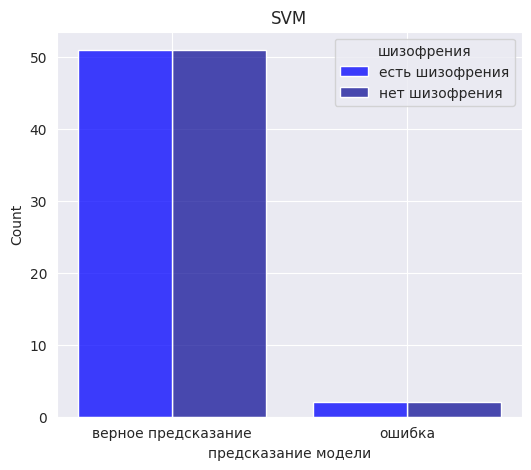

In [18]:
sns.set_style("darkgrid")

plt.figure(figsize=(6,5))
sns.set_palette(sns.dark_palette(color='blue', n_colors=3, reverse=True))
fig = sns.histplot(data=df, x="предсказание модели", hue="шизофрения", multiple="dodge", shrink=.8)
plt.title('SVM')
plt.show()

Text(0.5, 0, 'Permutation Importance')

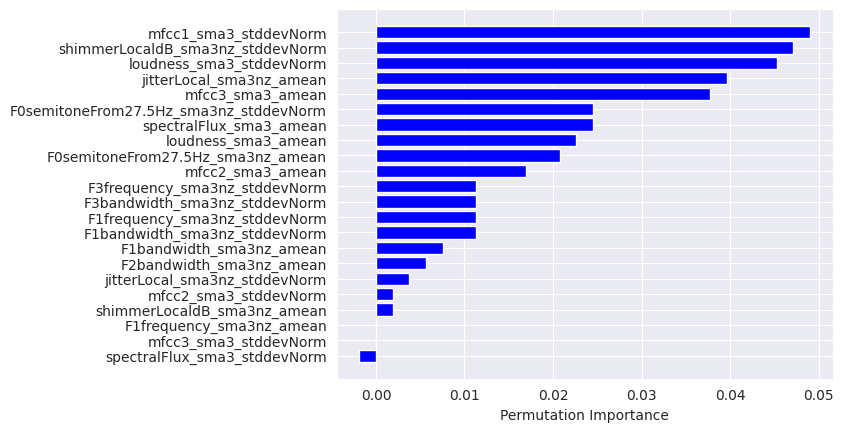

In [19]:
svc = joblib.load('/kaggle/working/SVM.pkl')

perm_importance = permutation_importance(svc, X_test, y_test)

feature_names = list(X_train.columns)
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")